<a href="https://colab.research.google.com/github/engimine/-engiminer-.github.io./blob/main/MINERIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Muestra del dataset generado:
   volumen_ton  profundidad_m  ley_mineral  dureza_roca  costo_energia  \
0         7312    1063.045763     4.311442     5.681889       0.130650   
1         4400     455.587497     8.443877     7.834596       0.111486   
2         8251     354.158000     2.015358     5.479450       0.096404   
3        16621     428.069010     2.104847     4.887999       0.100880   
4         4075    1828.754749     1.419018     7.177444       0.131685   

   costo_labor  produccion_diaria  rendimiento_equipo  costo_operativo  
0    36.030299                571            0.587035      1236.468445  
1    32.750480                527            0.773769      1144.688019  
2    34.756927                504            0.909295       841.186911  
3    37.705765                497            0.898043       661.469003  
4    23.031869                529            0.464925      1989.723046  


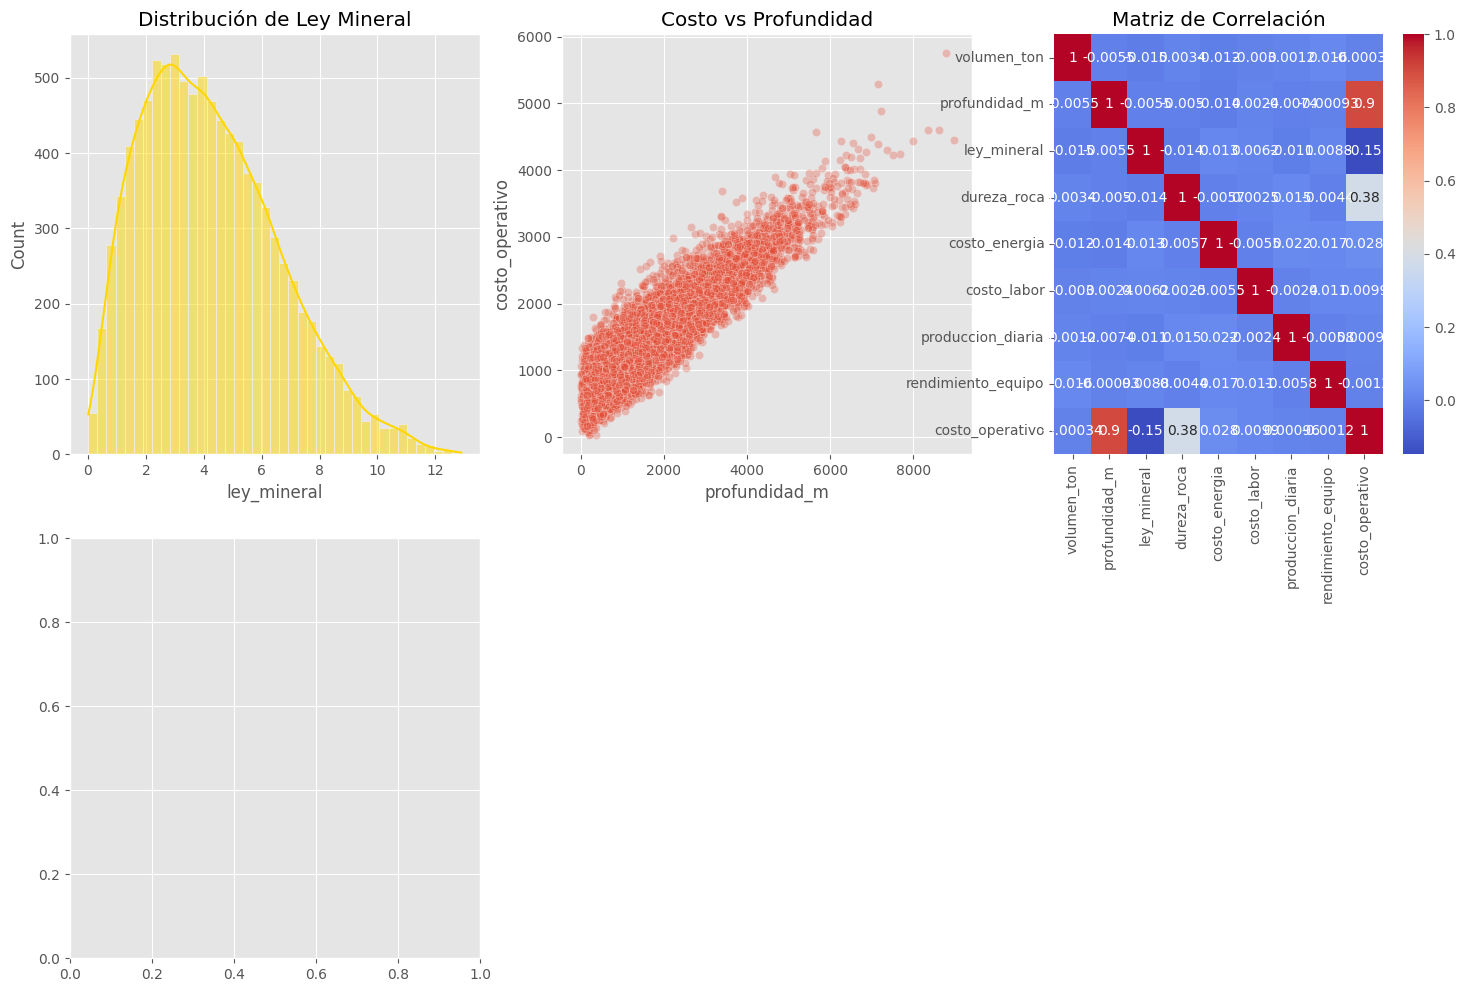

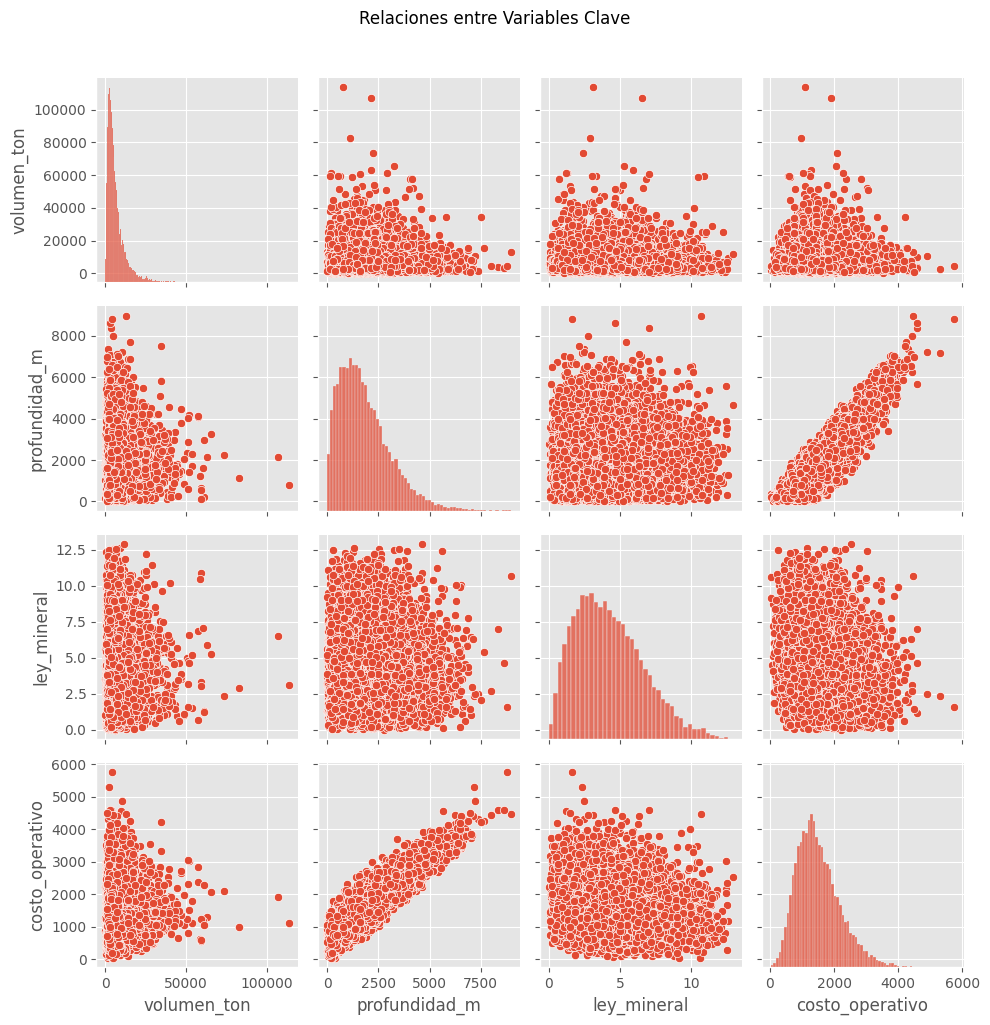

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2735359.0000 - mae: 1509.0474 - val_loss: 2644192.0000 - val_mae: 1477.6848
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2444044.5000 - mae: 1414.5836 - val_loss: 1327087.7500 - val_mae: 1007.4861
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 830643.3750 - mae: 752.6751 - val_loss: 91161.3984 - val_mae: 237.5310
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107646.2969 - mae: 254.1658 - val_loss: 62386.6562 - val_mae: 194.3032
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 85893.5625 - mae: 226.6957 - val_loss: 53075.4688 - val_mae: 180.0243
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76277.3359 - mae: 217.9432 - val_loss: 47121.6250 - val_mae: 169.2647
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 75200.6875 - mae: 213.4989 - val_loss: 42280.8242 - val_mae: 161.2581
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70479.9062 - mae: 20

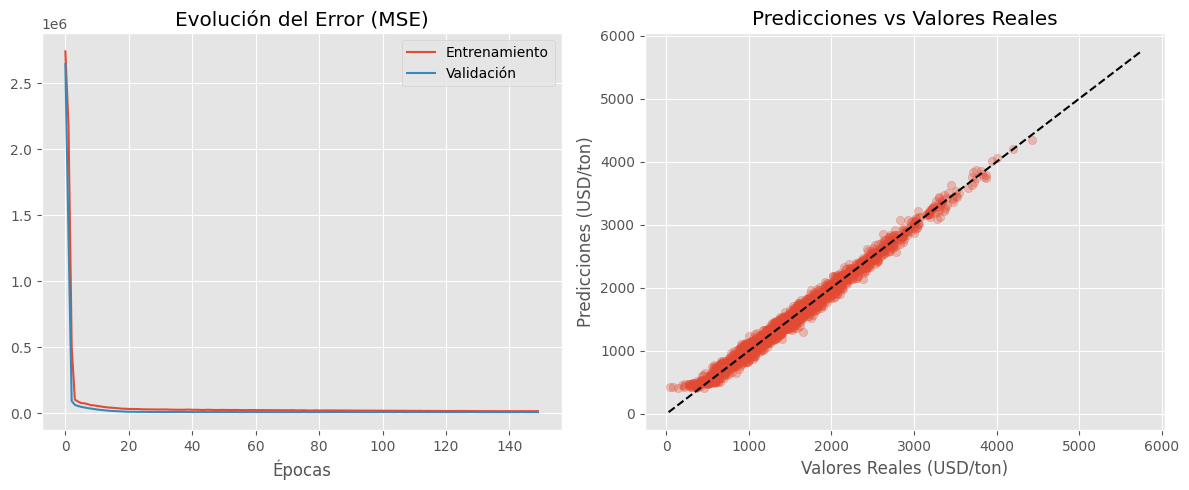

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_2, built=True> does not.

In [ ]:
#@title Código completo: Simulación Minera con IA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

# Configuración inicial
plt.style.use('ggplot')
np.random.seed(42)
tf.random.set_seed(42)

# ================================================
# 1. GENERACIÓN DE DATOS SINTÉTICOS MINEROS
# ================================================
def generar_datos_mineros(n_muestras=5000):
    """Genera dataset sintético de explotación minera"""
    data = {
        # Variables geológicas
        'volumen_ton': np.random.lognormal(mean=8.5, sigma=0.8, size=n_muestras).astype(int),
        'profundidad_m': np.random.weibull(a=1.5, size=n_muestras) * 2000,
        'ley_mineral': np.random.beta(a=2, b=5, size=n_muestras) * 15,
        'dureza_roca': np.random.normal(loc=5.5, scale=1.5, size=n_muestras),

        # Variables económicas
        'costo_energia': np.random.uniform(0.08, 0.15, size=n_muestras),  # USD/kWh
        'costo_labor': np.random.normal(35, 5, size=n_muestras),         # USD/hora

        # Variables operativas
        'produccion_diaria': np.random.poisson(lam=500, size=n_muestras),
        'rendimiento_equipo': np.random.beta(a=3, b=1.5, size=n_muestras)
    }

    df = pd.DataFrame(data)

    # Cálculo del costo operativo (target)
    df['costo_operativo'] = (
        (df['profundidad_m'] * 0.5) +
        (df['dureza_roca'] ** 1.8) * 25 -
        (df['ley_mineral'] * 40) +
        (df['costo_energia'] * 1500) +
        (df['costo_labor'] * 0.8) +
        np.random.normal(0, 75, size=n_muestras)
    )

    # Eliminar valores negativos
    df = df[df['costo_operativo'] > 0]

    return df

# Generar dataset
mineria_df = generar_datos_mineros(10000)
print("\nMuestra del dataset generado:")
print(mineria_df.head())

# ================================================
# 2. ANÁLISIS Y VISUALIZACIÓN DE DATOS
# ================================================
# Configurar gráficos
fig = plt.figure(figsize=(18, 12))

# Distribución de variables clave
plt.subplot(2, 3, 1)
sns.histplot(mineria_df['ley_mineral'], kde=True, color='gold')
plt.title('Distribución de Ley Mineral')

plt.subplot(2, 3, 2)
sns.scatterplot(x='profundidad_m', y='costo_operativo', data=mineria_df, alpha=0.3)
plt.title('Costo vs Profundidad')

plt.subplot(2, 3, 3)
sns.heatmap(mineria_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

# Pairplot de variables principales
plt.subplot(2, 3, 4)
sns.pairplot(mineria_df[['volumen_ton', 'profundidad_m', 'ley_mineral', 'costo_operativo']])
plt.suptitle('Relaciones entre Variables Clave', y=1.02)

plt.tight_layout()
plt.show()

# ================================================
# 3. PREPROCESAMIENTO DE DATOS
# ================================================
# Selección de características
features = ['volumen_ton', 'profundidad_m', 'ley_mineral', 'dureza_roca',
            'costo_energia', 'costo_labor', 'rendimiento_equipo']
X = mineria_df[features]
y = mineria_df['costo_operativo']

# Normalización
X_normalized = (X - X.mean()) / X.std()

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# ================================================
# 4. CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO
# ================================================
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    verbose=1
)

# ================================================
# 5. EVALUACIÓN Y VISUALIZACIÓN DE RESULTADOS
# ================================================
# Gráfico de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución del Error (MSE)')
plt.xlabel('Épocas')
plt.legend()

plt.subplot(1, 2, 2)
y_pred = model.predict(X_test).flatten()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (USD/ton)')
plt.ylabel('Predicciones (USD/ton)')
plt.tight_layout()
plt.show()

# Importancia de características
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title('Importancia de Características (Permutación)')
plt.show()

# ================================================
# 6. SIMULACIÓN DE NUEVOS YACIMIENTOS
# ================================================
# Generar nuevos datos de prueba
nuevos_yacimientos = pd.DataFrame({
    'volumen_ton': [15000, 50000, 8000],
    'profundidad_m': [800, 1800, 300],
    'ley_mineral': [8.5, 2.3, 12.1],
    'dureza_roca': [6.2, 7.8, 4.5],
    'costo_energia': [0.12, 0.15, 0.09],
    'costo_labor': [38, 42, 32],
    'rendimiento_equipo': [0.85, 0.65, 0.92]
})

# Normalizar y predecir
nuevos_yacimientos_norm = (nuevos_yacimientos - X.mean()) / X.std()
predicciones = model.predict(nuevos_yacimientos_norm).flatten()

# Mostrar resultados
print("\nPredicciones para nuevos yacimientos:")
for i, (idx, row) in enumerate(nuevos_yacimientos.iterrows()):
    print(f"\nYacimiento {i+1}:")
    print(f"• Volumen: {row['volumen_ton']:,.0f} ton")
    print(f"• Profundidad: {row['profundidad_m']:,.0f} m")
    print(f"• Ley mineral: {row['ley_mineral']:.1f}%")
    print(f"→ Costo estimado: USD {predicciones[i]:,.2f}/ton")

# Visualización 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    mineria_df['profundidad_m'],
    mineria_df['ley_mineral'],
    mineria_df['costo_operativo'],
    c=mineria_df['costo_operativo'],
    cmap='viridis',
    alpha=0.5
)

ax.set_xlabel('Profundidad (m)')
ax.set_ylabel('Ley Mineral (%)')
ax.set_zlabel('Costo Operativo (USD/ton)')
plt.title('Relación 3D: Profundidad vs Ley Mineral vs Costo')
plt.colorbar(scatter)
plt.show()

In [ ]:
# ================================================
# 5. EVALUACIÓN Y VISUALIZACIÓN DE RESULTADOS (CORREGIDO)
# ================================================
from sklearn.metrics import make_scorer

# Crear un wrapper para el modelo de Keras
class KerasWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        return self.model.predict(X).flatten()

# Métrica personalizada (MAE)
def mae_score(y_true, y_pred):
    return -mean_absolute_error(y_true, y_pred)  # El signo negativo es para maximización

# Configurar el scorer
keras_scorer = make_scorer(mae_score, greater_is_better=False)

# Crear instancia del wrapper
wrapped_model = KerasWrapper(model)

# Calcular importancia por permutación
result = permutation_importance(
    wrapped_model,
    X_test.values,
    y_test.values,
    n_repeats=10,
    scoring=keras_scorer,
    random_state=42
)

# Visualización de importancia de características
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title('Importancia de Características (Permutación)')
plt.show()

InvalidParameterError: The 'estimator' parameter of permutation_importance must be an object implementing 'fit'. Got <__main__.KerasWrapper object at 0x7af18ee47310> instead.